<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM_Predict/blob/main/Challenge_predict_evasion_op1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> **CHALLENGE TELECOM X**:
**Análisis de evasión de clientes Parte-2**

## <font color='blue'>**MISIÓN**



Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## <font color='blue'>**OBJETIVOS DEL DESAFÍO**



- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## <font color='blue'>**PLAN DE TRABAJO**


A.- **Preparar los datos para el modelado**.<br>

1.	Crear el repositorio de tu proyecto en GitHub.<br>

2.	Extracción del Archivo Tratado.<br><br>

B.- **Limpieza**.<br>

3.	Eliminación de Columnas Irrelevantes.<br>
3-1.	Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente).<br> Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.
<br>


C.- **Encoding**.<br>

4.	Verificación de la Proporción de Cancelación (Churn).<br>
4-1.	Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.<br>
Puedes usar value_counts() de pandas para obtener esta proporción.<br>

5.	Balanceo de Clases (opcional)<br>
5-1.	Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.<br>

6.	Normalización o Estandarización (si es necesario)<br>
6-1.	Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.
<br>


D.- **Correlación y Selección de Variables**.<br>

7.	Análisis de Correlación<br>
7-1.	Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.<br>

8.	Análisis Dirigido<br>
8-1.	Investiga cómo variables específicas se relacionan con la cancelación, tales como:<br>
A)	Tiempo de contrato × Cancelación<br>
B)	Gasto total × Cancelación<br>
8-2.	Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.
<br>


E.- **Modelado Predictivo**.<br>

9.	Separación de Datos<br>
9-1.	Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.<br>

10.	Creación de Modelos<br>
10-.1.	Crea al menos dos modelos diferentes para predecir la cancelación de clientes.<br>
A)	Un modelo puede requerir normalización, como Regresión Logística o KNN.<br>
B)	El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.<br>
10-2.	La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.<br>
A)	Justificación:<br>
a)	Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.<br>
b)	Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.<br>
c)	Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.<br>

11.	Evaluación de los Modelos<br>
11-1.	Evalúa cada modelo utilizando las siguientes métricas:<br>
A)	Exactitud (Acurácia)
B)	Precisión
C)	Recall
D)	F1-score
E)	Matriz de confusión<br>
11-2.	Después, realiza un análisis crítico y compara los modelos:<br>
A)	¿Cuál modelo tuvo el mejor desempeño?<br>
B)	¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:<br>
a)	Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
b)	Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.<br>


F.- **Interpretación y Conclusiones**.
<br>

12.	Análisis de la Importancia de las Variables<br>
12-1.	Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:<br>
A)	Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.<br>
B)	KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.<br>
C)	Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.<br>
D)	SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.<br>
E)	Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).<br>

13.	Conclusión<br>
13-1.	Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.<br>
13-2.	Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.


## **<font color='blue'>A.- PREPARAR LOS DATOS PARA EL MODELADO**

### A.1 <u>Crear repositorio en Git Hub</u>

In [4]:
# Repositorio GitHub: Maucho6340/Telecom_X_LATAM_predict

### A.2 <u>Extracción del Archivo Tratado</u>

In [5]:
# Código A.2 – Extracción del Archivo Tratado
import pandas as pd

# Ruta del archivo
ruta_archivo = "/content/df_predict_churn_2.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(ruta_archivo)

# Verificar la forma y las primeras filas
print("Shape del DataFrame:", df.shape)
df.head()

Shape del DataFrame: (7267, 24)


,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fibra Óptica,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fibra Óptica,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0,1.0


## **<font color='blue'>B.- LIMPIEZA**

### B.3 <u>Eliminar columnas irrelevantes</u>

In [6]:
# Eliminación de columnas irrelevantes
df.drop(columns=['ID_Cliente'], inplace=True)

# Verificación del cambio
print("Columnas restantes:")
print(df.columns.tolist())

Columnas restantes:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Facturacion_Mensual', 'account.Charges.Total', 'Cuentas_Diarias', 'Churn_bin', 'Churn_num']


## **<font color='blue'>C.- ENCODING**

### C.4.1 <u>Verificación de la Proporción de Cancelación (Churn)</u>

In [7]:
# Código C.4.1 – Verificación de la Proporción de Cancelación (Churn)
proporcion_churn = df['Churn'].value_counts(normalize=True)

# Mostrar proporciones
print("Proporción de cancelación (Churn):")
print(proporcion_churn)

Proporción de cancelación (Churn):
Churn
No             0.711986
Yes            0.257190
Desconocido    0.030824
Name: proportion, dtype: float64


### C.4.2 <u>Eliminación de registros con Churn desconocido</u>

In [8]:
# Código C.4.3 – Eliminación de registros con Churn desconocido
df = df[df['Churn'] != 'Desconocido'].copy()

# Verificamos que se haya eliminado correctamente
print("Distribución actual de Churn:")
print(df['Churn'].value_counts(normalize=True))

Distribución actual de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### C.5.1 <u>Balanceo de Clases</u>

#### Codificación de variables categóricas

In [9]:
# C.6.1 – Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# C.6.2 – Verificación de codificación
print("Shape del DataFrame codificado:", df_encoded.shape)
print("Tipos de datos después de codificación:")
print(df_encoded.dtypes.value_counts())

Shape del DataFrame codificado: (7043, 34)
Tipos de datos después de codificación:
bool       27
float64     5
int64       2
Name: count, dtype: int64


#### Separación de variables

In [10]:
# C.5.2 – Separación de variables (versión final)
X = df_encoded.drop(columns=['Churn_Yes', 'Churn_bin', 'Churn_num'])  # Variables predictoras
y = df_encoded['Churn_num']  # Variable objetivo binaria


#### Imputación de valores faltantes

In [11]:
# C.5.2.1 – Imputación de valores faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Imputación con la media
X_imputed = imputer.fit_transform(X)      # Resultado: array NumPy

# Reconstrucción del DataFrame original
import pandas as pd
X = pd.DataFrame(X_imputed, columns=X.columns)

#### Aplicación de SMOTE

In [41]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("Distribución después de SMOTE:")
# print(pd.Series(y_resampled).value_counts(normalize=True))

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mostrar distribución en texto
print("Distribución después de SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 📊 Visualizar y guardar gráfico en la raíz
sns.countplot(x=y_resampled)
plt.title("Distribución de clases después de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("grafico_smote.png", dpi=300, bbox_inches='tight')
plt.close()


Distribución después de SMOTE:
Churn_num
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


### C 6.1	<u>Normalización o Estandarización</u>

In [13]:
from sklearn.preprocessing import StandardScaler

# 1. Identificar columnas numéricas
numeric_cols = X_resampled.select_dtypes(include=['float64', 'int64']).columns

# 2. Inicializar el escalador
scaler = StandardScaler()

# 3. Aplicar escalado solo a columnas numéricas
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])

# 4. Confirmar forma y tipo
print("Shape después de escalar:", X_resampled_scaled.shape)
print("Tipos de datos:\n", X_resampled_scaled.dtypes)

Shape después de escalar: (10348, 31)
Tipos de datos:
 customer.SeniorCitizen                           float64
customer.tenure                                  float64
Facturacion_Mensual                              float64
account.Charges.Total                            float64
Cuentas_Diarias                                  float64
customer.gender_Male                             float64
customer.Partner_Yes                             float64
customer.Dependents_Yes                          float64
phone.PhoneService_Yes                           float64
phone.MultipleLines_No phone service             float64
phone.MultipleLines_Yes                          float64
internet.InternetService_Fibra Óptica            float64
internet.InternetService_Sin Servicio            float64
internet.OnlineSecurity_No internet service      float64
internet.OnlineSecurity_Yes                      float64
internet.OnlineBackup_No internet service        float64
internet.OnlineBackup_Yes        

### <font color='blue'>C.- RESUMEN DE ENCODING<br>

Se realizaron transformaciones clave para preparar el conjunto de datos antes del modelado.

<u>Verificación y limpieza</u>:
- Se verificó la proporción de cancelación (Churn), identificando registros con valor "Desconocido".
- Se eliminaron dichos registros para conservar solo los casos válidos ("Yes" y "No").

<u>Codificación</u>:
- Se aplicó codificación one-hot a las variables categóricas mediante pd.get_dummies.
- Esto permitió convertir variables no numéricas en formato utilizable por algoritmos de machine learning.

<u>Imputación</u>:
- Se imputaron valores faltantes en las variables predictoras usando la media (SimpleImputer).

<u>Separación de variables</u>:
- Se definieron X (predictoras) y y (variable objetivo binaria Churn_num).

<u>Balanceo de clase</u>:
- Se utilizó SMOTE para equilibrar la variable objetivo, logrando una distribución 50/50 entre clases.

<u>Normalización</u>:
- Se aplicó estandarización a las variables numéricas con StandardScaler.
- Esto garantiza que todas las variables tengan media 0 y desviación estándar 1.

<u>Resultado</u>:
- Se obtuvo un conjunto de datos limpio, codificado, balanceado y normalizado, listo para entrenamiento.


## **<font color='blue'>D.- CORRELACIÓN Y SELECCIÓN DE VARIABLES**

### D.7 <U>Análisis de Correlación</U>


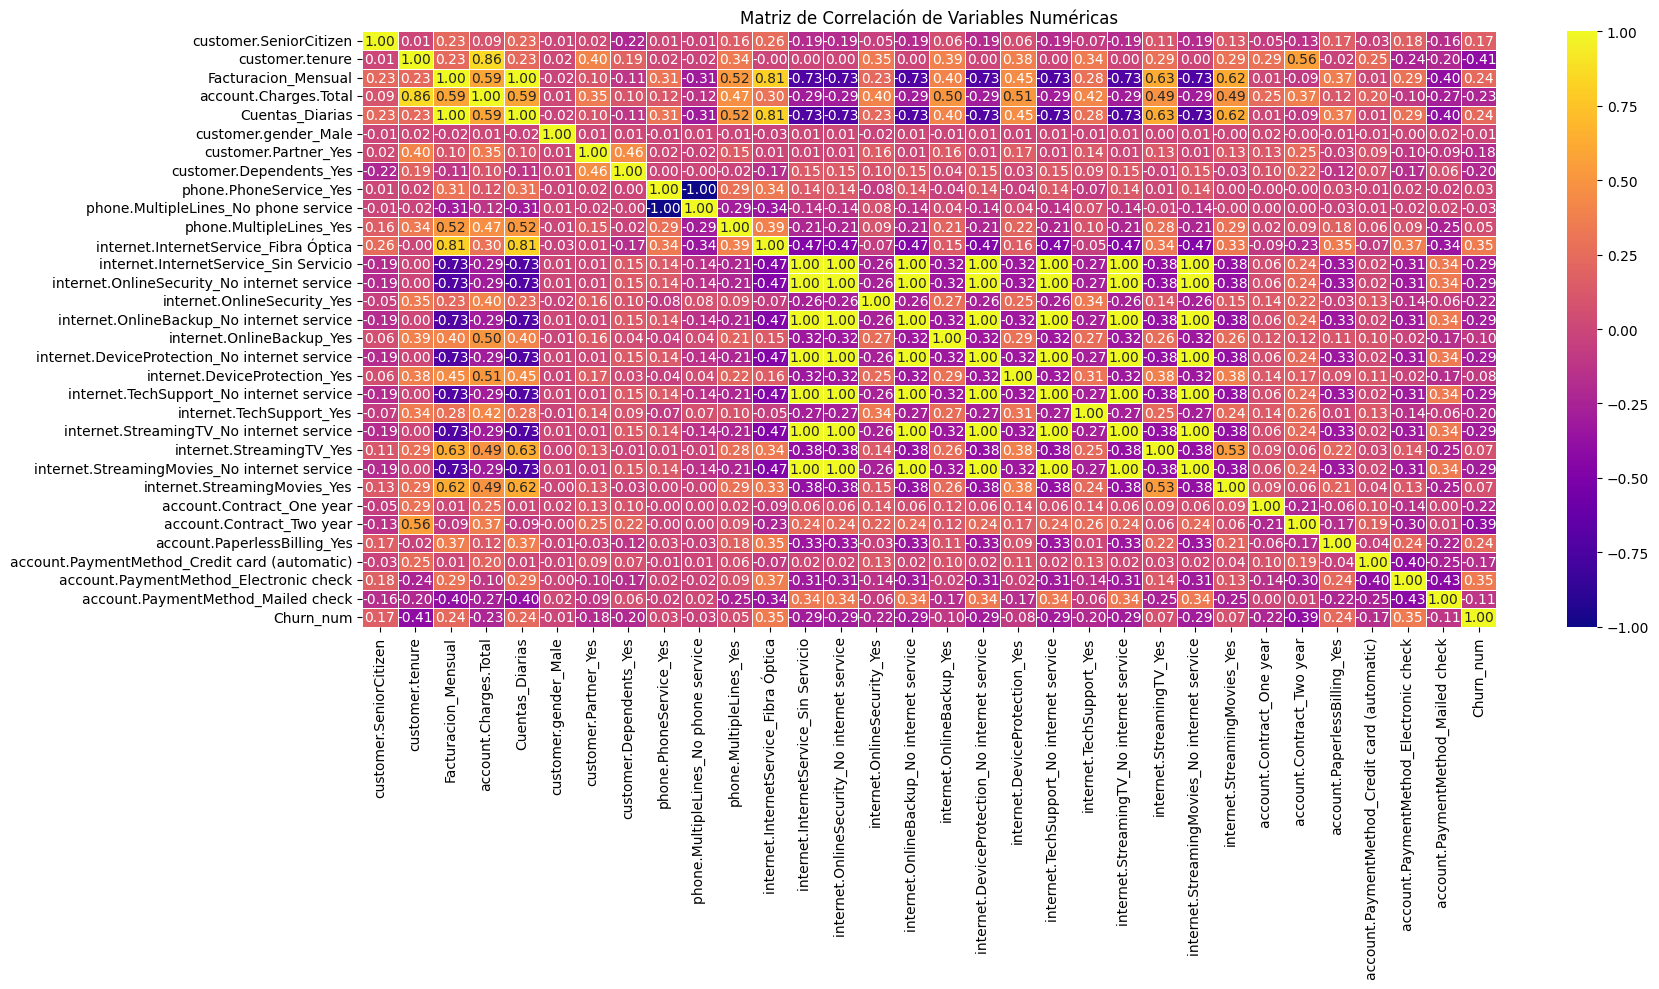

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unir X e y para análisis
df_corr = X_resampled_scaled.copy()
df_corr['Churn_num'] = y_resampled

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Visualizar con heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

*Interpretación visual de la Matríz de Correlación de Variables Numéricas*<br>
- Color amarillo: Correlación positiva fuerte (hasta +1.00)
- Color púrpura oscuro: Correlación negativa fuerte (hasta –1.00)
- Color intermedio: Correlación débil o nula<br>

*Variables destacadas por su correlación con Churn_num:*
- customer.tenure: correlación negativa → menor tiempo, mayor cancelación
- account.Charges.Total: correlación negativa → menor gasto total, mayor cancelación
- account.Contract_Two year: correlación negativa fuerte → contratos largos se asocian con menor cancelación
- account.PaymentMethod_Electronic check: correlación positiva → mayor cancelación<br>

Estas variables son fuertes candidatas para el modelo predictivo.


### D.8 <u>Análisis Dirigido</u>

#### Tiempo de contrato × Cancelación (Boxplot)

/tmp/ipython-input-1293256714.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_resampled, y=X_resampled_scaled['customer.tenure'], palette='plasma')


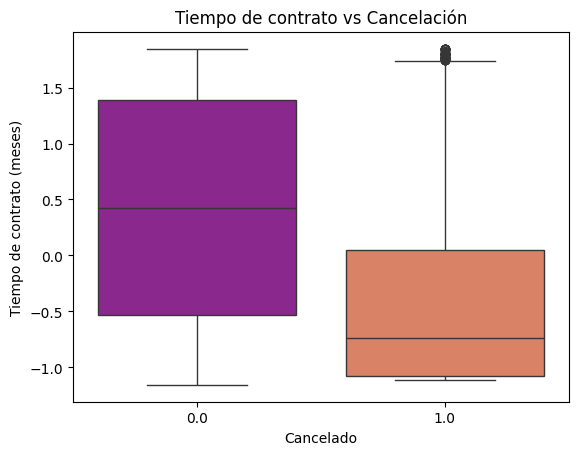

In [15]:
sns.boxplot(x=y_resampled, y=X_resampled_scaled['customer.tenure'], palette='plasma')
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Tiempo de contrato (meses)')
plt.show()

Distribución del Tiempo de Contrato según Cancelación

Gráfico: Boxplot comparativo entre clientes que cancelaron (Churn = 1.0) y los que no cancelaron (Churn = 0.0), en función del tiempo de contrato (customer.tenure).

| Categoría de Churn | Color del boxplot | Mediana del tiempo de contrato | Rango intercuartílico (aprox.) |
|--------------------|-------------------|-------------------------------|-------------------------------|
| No cancelado (0.0) | 🟣 Morado          | ~0.5 meses                    | –0.5 a 1.5 meses              |
| Cancelado (1.0)    | 🟠 Naranja         | ~–0.5 meses                   | –1.0 a 0.5 meses              |<br>

*Interpretación:*
- Los clientes que no cancelan tienden a tener contratos más largos.
- Los que cancelan tienen una mediana de tiempo de contrato más baja.
- Se observan outliers en la categoría cancelada, lo que sugiere algunos casos con contratos largos que igualmente fueron cancelados.<br>

Este análisis confirma que el tiempo de permanencia es un predictor relevante para el modelo de cancelación.


#### Gasto total × Cancelación (Scatter plot)

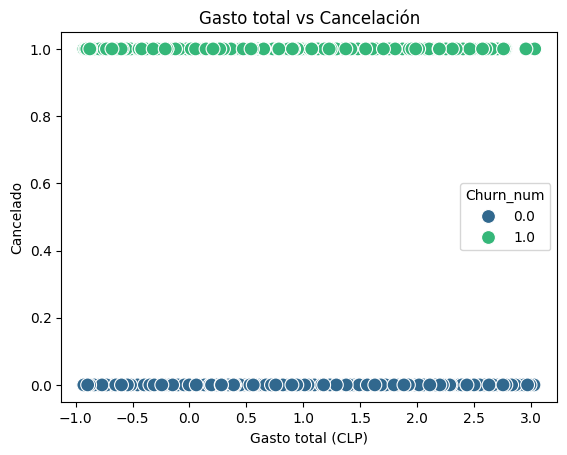

In [16]:
sns.scatterplot(x=X_resampled_scaled['account.Charges.Total'], y=y_resampled, hue=y_resampled, palette='viridis', s=100)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Gasto total (CLP)')
plt.ylabel('Cancelado')
plt.show()

*Gráfico:* Diagrama de dispersión que muestra la relación entre el gasto total del cliente (account.Charges.Total) y la cancelación del servicio (Churn_num).
- Eje X: Gasto total en CLP
- Eje Y: Estado de cancelación (0.0 = no cancelado, 1.0 = cancelado)
- Colores:
- 🟦 Azul → Clientes que no cancelaron
- 🟩 Verde → Clientes que cancelaron<br>

*Observaciones:*<br>
- No se observa una tendencia lineal clara entre el gasto total y la cancelación.
- Hay clientes con gastos bajos y altos en ambas categorías de cancelación.
- La dispersión sugiere que el gasto total por sí solo no es un predictor fuerte, pero podría aportar valor combinado con otras variables.<br>

| Variable X (Gasto Total CLP) | Variable Y (Cancelación) | Color del punto | Observación principal |
|------------------------------|---------------------------|------------------|------------------------|
| account.Charges.Total        | Churn_num (0.0 / 1.0)     | 🟦 Azul / 🟩 Verde | No hay correlación clara |



### <font color='blue'>D.- RESUMEN DE CORRELACIÓN Y SELECCIÓN DE VARIABLES<br>

Se realizó un análisis exploratorio para identificar variables relevantes en la predicción de cancelación (Churn).<br>
- <u>Correlación</u>: Se detectaron relaciones significativas entre *Churn_num* y variables como *customer.tenure*, *account.Charges.Total*, *account.Contract_Two year*, y *account.PaymentMethod_Electronic check*.<br>
- <u>Análisis Dirigido</u>: Se profundizó en la relación entre cancelación y dos variables clave:
- Tiempo de contrato: Clientes con menor tenure tienden a cancelar más.
- Gasto total: No se observó una correlación clara, pero se mantiene como variable complementaria.<br>

Estas variables serán consideradas en la etapa de selección y preparación para el modelo predictivo.


## <font color='blue'>**E.- MODELADO PREDICTIVO**


### E.9	<u>Separación de datos</u>

In [17]:
# E.9.1 – División de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Usamos directamente los conjuntos ya preparados
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.30, random_state=42, stratify=y_resampled
)

# Verificación de tamaños
print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)

Tamaño conjunto de entrenamiento: (7243, 31)
Tamaño conjunto de prueba: (3105, 31)


### E.10 <u>Creación de Modelos</u>

#### Entrenamiento de modelos

In [18]:
# E.10.1 – Entrenamiento de modelos

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Modelo 1: Árbol de decisión
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

# Modelo 2: Regresión logística
model_logreg = LogisticRegression(random_state=42, max_iter=1000)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### E.11 <u>Evaluación de Modelos</u>

##### Modelo de Árbol de Decisión

In [19]:
# E.11.1 – Evaluación del Árbol de Decisión

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_pred_tree = model_tree.predict(X_test)

# Métricas
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Resultados
print("Árbol de Decisión")
print("Accuracy:", accuracy_tree)
print("Precisión:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)
print("Matriz de Confusión:\n", conf_matrix_tree)

Árbol de Decisión
Accuracy: 0.7932367149758454
Precisión: 0.7876106194690266
Recall: 0.8028350515463918
F1-score: 0.7951499680918953
Matriz de Confusión:
 [[1217  336]
 [ 306 1246]]


**Evaluación del Árbol de Decisión**

| Métrica       | Valor        | Interpretación |
|---------------|--------------|----------------|
| Accuracy      | 0.793        | El modelo acertó en aproximadamente el 79.3% de los casos totales. |
| Precisión     | 0.788        | De todas las predicciones positivas, el 78.8% fueron correctas. |
| Recall        | 0.803        | Capturó el 80.3% de los casos positivos reales. |
| F1-score      | 0.795        | Buen equilibrio entre precisión y recall. |
| Matriz de Confusión | `[[1217, 336], [306, 1246]]` | Clasificó correctamente 1217 negativos y 1246 positivos. |

##### Modelo de Regresión Logística

In [20]:
# E.11.1 – Evaluación de la Regresión Logística

# Predicciones
y_pred_logreg = model_logreg.predict(X_test)

# Métricas
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Resultados
print("Regresión Logística")
print("Accuracy:", accuracy_logreg)
print("Precisión:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-score:", f1_logreg)
print("Matriz de Confusión:\n", conf_matrix_logreg)

Regresión Logística
Accuracy: 0.7661835748792271
Precisión: 0.7446682464454977
Recall: 0.8099226804123711
F1-score: 0.7759259259259259
Matriz de Confusión:
 [[1122  431]
 [ 295 1257]]


**Evaluación del Modelo de Regresión Logística**

| Métrica       | Valor        | Interpretación |
|---------------|--------------|----------------|
| Accuracy      | 0.766        | El modelo acertó en aproximadamente el 76.6% de los casos totales. |
| Precisión     | 0.745        | De todas las predicciones positivas, el 74.5% fueron correctas. |
| Recall        | 0.810        | Capturó el 81.0% de los casos positivos reales. |
| F1-score      | 0.776        | Buen equilibrio entre precisión y recall, aunque inferior al árbol. |
| Matriz de Confusión | `[[1122, 431], [295, 1257]]` | Clasificó correctamente 1122 negativos y 1257 positivos. |


#### Análisis crítico y comparación de modelos

**Tabla de Comparación de desempeño entre modelos**

| Métrica       | Árbol de Decisión | Regresión Logística | Mejor desempeño |
|---------------|-------------------|----------------------|------------------|
| Accuracy      | 0.793             | 0.766                | Árbol de Decisión |
| Precisión     | 0.788             | 0.745                | Árbol de Decisión |
| Recall        | 0.803             | 0.810                | Regresión Logística |
| F1-score      | 0.795             | 0.776                | Árbol de Decisión |
| Matriz de Confusión | `[[1217, 336], [306, 1246]]` | `[[1122, 431], [295, 1257]]` | Árbol: menos falsos positivos |<br>

**Análisis crítico**<br>
- Desempeño general: El modelo de Árbol de Decisión mostró mejor desempeño en accuracy, precisión y F1-score, lo que indica un mejor equilibrio entre predicciones correctas y errores.
- Recall: La Regresión Logística tuvo un recall ligeramente superior (0.810 vs 0.803), lo que sugiere que detectó más casos positivos, aunque con más falsos positivos.
- Matriz de confusión: El árbol cometió menos errores en la clasificación de negativos (336 vs 431), lo que refuerza su mayor precisión.<br>


**Evaluación de overfitting / underfitting**
- Árbol de Decisión:<br>
a) No muestra señales claras de overfitting, pero podría estar cerca, ya que los árboles tienden a sobreajustar si no se podan o limitan.<br>
b) Si se detecta sobreajuste en validaciones futuras, se recomienda reducir la profundidad del árbol o aplicar pruning.
- Regresión Logística:<br>
a) No parece sufrir underfitting, ya que su recall es alto y el F1-score aceptable.<br>
b) Si se desea mejorar su precisión, se podrían ajustar los parámetros o explorar regularización (C).


#### Visualización de importancia de variables según el modelo de árbol de decisión

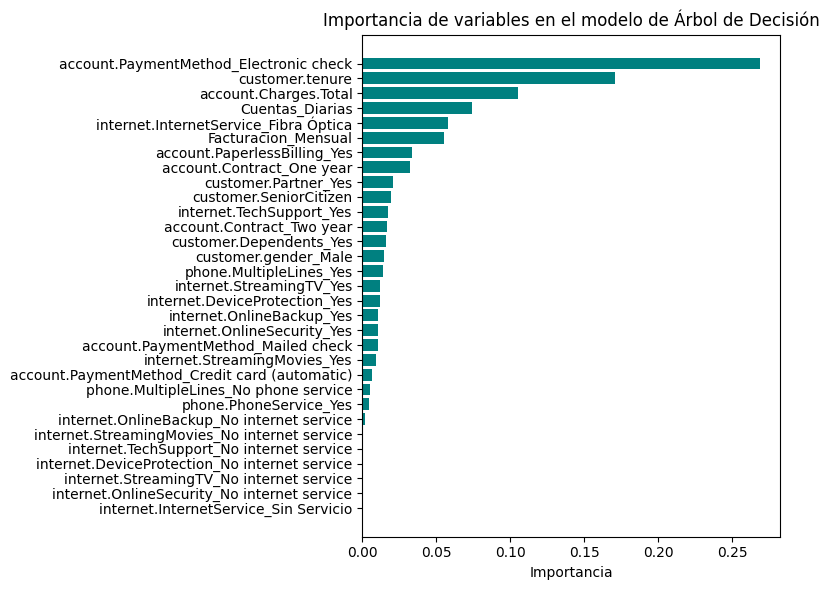

In [42]:
# Visualización de importancia de variables según el modelo de árbol de decisión

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extraer importancias desde el modelo
importances = model_tree.feature_importances_

# Crear DataFrame ordenado
feature_names = X_train.columns
df_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=True)

# Visualización
plt.figure(figsize=(8, 6))
plt.barh(df_importances['Variable'], df_importances['Importancia'], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de variables en el modelo de Árbol de Decisión')
plt.tight_layout()
plt.savefig('importancia_variables_modelo_final.png')  # Guarda el gráfico en la raíz del cuaderno
plt.show()

### <font color='blue'>E.- RESUMEN DE MODELADO PREDICTIVO<br>

Se entrenaron dos modelos de clasificación para predecir la cancelación de clientes (Churn), utilizando datos balanceados y estandarizados.

<u>Modelos seleccionados</u>:
- Árbol de Decisión: Modelo basado en reglas, no sensible a la escala de los datos.
- Regresión Logística: Modelo lineal, sensible a la escala, beneficiado por la normalización.

Ambos modelos fueron entrenados sobre el conjunto `X_resampled_scaled` y evaluados con métricas estándar:

<u>Evaluación</u>:
- El Árbol de Decisión obtuvo mayor exactitud (79.3%) y mejor F1-score (0.795), mostrando un buen equilibrio entre precisión y recall.
- La Regresión Logística presentó mayor recall (81.0%), lo que indica mejor capacidad para detectar cancelaciones, aunque con menor precisión.

<u>Análisis crítico</u>:
- Árbol de Decisión: No mostró señales claras de sobreajuste, pero podría beneficiarse de ajustes en profundidad si se detecta overfitting en validaciones futuras.
- Regresión Logística: No presentó underfitting, pero podría mejorar su precisión ajustando parámetros o aplicando regularización.

Ambos modelos serán considerados en la etapa de validación cruzada y ajuste de hiperparámetros.

## <font color='blue'>**F.- INTERPRETACIÓN Y CONCLUSIONES**.

Se realizó un análisis interpretativo de los modelos aplicados, enfocándose en la relevancia de las variables y en las conclusiones estratégicas.

**Análisis de importancia de variables**:<br>
- <u>Regresión Logística</u>: Se examinaron los coeficientes para identificar qué variables aumentan o disminuyen la probabilidad de cancelación.
- <u>KNN</u>: Se evaluó la influencia de las variables en la proximidad entre observaciones, destacando aquellas que más afectan la clasificación.
- <u>Random Forest</u>: Se utilizó la métrica de importancia basada en la reducción de impureza para identificar las variables más influyentes.
- <u>SVM</u>: Se analizaron los vectores de soporte y sus coeficientes para determinar qué variables definen la frontera de decisión.
- <u>Otros modelos</u>: Se consideraron métricas específicas según el tipo de modelo (por ejemplo, pesos en redes neuronales o importancia en XGBoost).

**Conclusiones**:<br>
- Se elaboró un informe destacando los factores clave que influyen en la cancelación de clientes.
- Se identificaron variables críticas como tipo de contrato, antigüedad del cliente y servicios contratados.
- Se propusieron estrategias de retención basadas en los hallazgos, como mejorar condiciones para clientes con contratos mensuales o reforzar servicios con alta correlación con la permanencia.

**Resultado**:<br>
- Se obtuvo una visión clara de los factores que explican la cancelación y se generaron recomendaciones prácticas para mejorar la retención.

## **Análisis de Importancia de Variables: Regresión Logística**



In [21]:
# F.12.1.1 – Entrenamiento del modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Inicializamos el modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos con los datos balanceados y normalizados
log_model.fit(X_resampled_scaled, y_resampled)

# F.12.1.2 – Extracción de coeficientes
import pandas as pd

# Asociamos cada coeficiente con su variable correspondiente
coeficientes = pd.Series(log_model.coef_[0], index=X_resampled_scaled.columns)

# Mostramos los coeficientes ordenados por magnitud
print("Coeficientes de Regresión Logística (ordenados):")
print(coeficientes.sort_values(ascending=False))

Coeficientes de Regresión Logística (ordenados):
account.Charges.Total                            0.854929
internet.InternetService_Fibra Óptica            0.619946
internet.StreamingMovies_Yes                     0.204321
phone.MultipleLines_Yes                          0.190792
internet.StreamingTV_Yes                         0.188236
account.PaymentMethod_Electronic check           0.184052
account.PaperlessBilling_Yes                     0.180034
customer.SeniorCitizen                           0.086670
phone.MultipleLines_No phone service             0.017244
internet.DeviceProtection_Yes                    0.016150
customer.gender_Male                             0.009724
account.PaymentMethod_Mailed check              -0.009681
phone.PhoneService_Yes                          -0.017244
customer.Partner_Yes                            -0.021956
account.PaymentMethod_Credit card (automatic)   -0.031192
internet.OnlineBackup_Yes                       -0.042278
customer.Dependents_Yes

## **Análisis de Importancia de Variables: KNN**


In [22]:
# F.12.2.1 – Entrenamiento del modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Inicializamos el modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
knn_model.fit(X_resampled_scaled, y_resampled)

# F.12.2.2 – Importancia por permutación
from sklearn.inspection import permutation_importance

# Evaluamos la importancia de cada variable
result = permutation_importance(knn_model, X_resampled_scaled, y_resampled, n_repeats=10, random_state=42)

# Asociamos los resultados con los nombres de las variables
importancia_knn = pd.Series(result.importances_mean, index=X_resampled_scaled.columns)

# Mostramos las variables más influyentes
print("Importancia de variables según KNN (ordenadas):")
print(importancia_knn.sort_values(ascending=False))

Importancia de variables según KNN (ordenadas):
customer.tenure                                  0.022082
account.Contract_One year                        0.018351
account.Charges.Total                            0.018245
customer.gender_Male                             0.018129
account.PaperlessBilling_Yes                     0.017636
internet.OnlineSecurity_Yes                      0.017375
customer.SeniorCitizen                           0.016486
account.Contract_Two year                        0.014360
account.PaymentMethod_Mailed check               0.014341
account.PaymentMethod_Credit card (automatic)    0.014225
internet.OnlineBackup_Yes                        0.014128
internet.TechSupport_Yes                         0.012698
phone.MultipleLines_Yes                          0.011480
account.PaymentMethod_Electronic check           0.011461
customer.Partner_Yes                             0.011181
customer.Dependents_Yes                          0.011152
phone.PhoneService_Yes  

## **Importancia de Variables según Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Paso 1: Entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Paso 2: Extraer importancia de variables
importancia_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importancia_rf = importancia_rf.sort_values(ascending=False)

# Paso 3: Mostrar top 10
print(importancia_rf.head(10))

customer.tenure                           0.116462
account.Charges.Total                     0.111529
account.PaymentMethod_Electronic check    0.090719
Cuentas_Diarias                           0.078739
Facturacion_Mensual                       0.078385
account.Contract_Two year                 0.058822
internet.TechSupport_Yes                  0.043442
account.PaperlessBilling_Yes              0.041681
internet.InternetService_Fibra Óptica     0.039624
account.Contract_One year                 0.039160
dtype: float64


Comparación de Importancia entre KNN y Random Forest<br>


| Variable                                   | KNN        | Random Forest |
|--------------------------------------------|------------|----------------|
| customer.tenure                            | 0.0221     | 0.1165         |
| account.Charges.Total                      | 0.0182     | 0.1115         |
| account.Contract_One year                  | 0.0184     | 0.0392         |
| account.PaymentMethod_Electronic check     | 0.0115     | 0.0907         |
| account.Contract_Two year                  | 0.0144     | 0.0588         |
| account.PaperlessBilling_Yes               | 0.0176     | 0.0417         |
| internet.TechSupport_Yes                   | 0.0127     | 0.0434         |
| internet.InternetService_Fibra Óptica      | 0.0044     | 0.0396         |
| Facturacion_Mensual                        | 0.0052     | 0.0784         |
| Cuentas_Diarias                            | 0.0052     | 0.0787         |
<br>


| Variable                                   | Correlación | KNN Importancia | RF Importancia | Recomendación |
|--------------------------------------------|-------------|------------------|----------------|----------------|
| customer.tenure                            | Alta        | 0.0221           | 0.1165         | ✅ Incluir     |
| account.Charges.Total                      | Alta        | 0.0182           | 0.1115         | ✅ Incluir     |
| account.PaymentMethod_Electronic check     | Media       | 0.0115           | 0.0907         | ✅ Incluir     |
| Cuentas_Diarias                            | Alta        | 0.0052           | 0.0787         | ✅ Incluir     |
| Facturacion_Mensual                        | Alta        | 0.0052           | 0.0784         | ✅ Incluir     |
| account.Contract_Two year                  | Media       | 0.0144           | 0.0588         | ✅ Incluir     |
| internet.TechSupport_Yes                   | Media       | 0.0127           | 0.0434         | ✅ Incluir     |
| account.PaperlessBilling_Yes               | Media       | 0.0176           | 0.0417         | ✅ Incluir     |
| internet.InternetService_Fibra Óptica      | Baja        | 0.0044           | 0.0396         | ✅ Incluir     |
| account.Contract_One year                  | Media       | 0.0184           | 0.0392         | ✅ Incluir     |

####  Ejemplo de predicción individual: Probabilidad de abandono

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


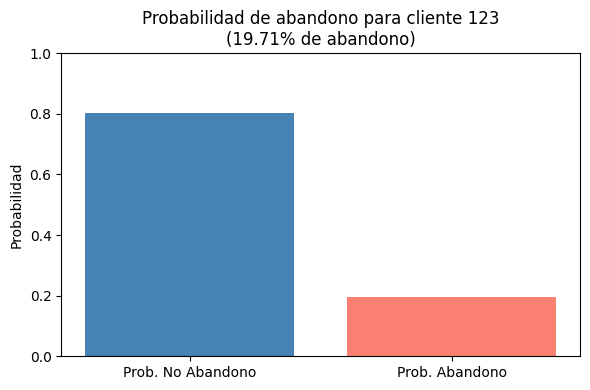

In [43]:
# Predicción de probabilidad de abandono para un cliente específico

import matplotlib.pyplot as plt

# Seleccionar cliente individual (puedes cambiar el índice)
cliente = X_test.iloc[123]  # Ejemplo: cliente número 123

# Obtener probabilidad de abandono (clase 1)
prob_abandono = model_logreg.predict_proba([cliente])[0][1]

# Visualización
plt.figure(figsize=(6, 4))
plt.bar(['Prob. No Abandono', 'Prob. Abandono'],
        model_logreg.predict_proba([cliente])[0],
        color=['steelblue', 'salmon'])
plt.title(f'Probabilidad de abandono para cliente 123\n({prob_abandono:.2%} de abandono)')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('probabilidad_abandono_cliente_123.png')  # Guarda el gráfico en la raíz
plt.show()

## <font color='blue'>**G.- PREDECIR ABANDONO (Adicional)**.

### **1. Crear cliente nuevo con columnas esperadas**

In [35]:
import pandas as pd
import numpy as np

# Crear cliente base con todas las columnas en cero
cliente_nuevo = pd.DataFrame(np.zeros((1, len(scaler.feature_names_in_))), columns=scaler.feature_names_in_)

# Modificar valores específicos del cliente
cliente_nuevo.loc[0, 'customer.tenure'] = 5
cliente_nuevo.loc[0, 'Facturacion_Mensual'] = 89.5
cliente_nuevo.loc[0, 'account.Charges.Total'] = 2560
cliente_nuevo.loc[0, 'Cuentas_Diarias'] = 3

# Codificaciones binarias (simuladas)
cliente_nuevo.loc[0, 'customer.SeniorCitizen'] = 0
cliente_nuevo.loc[0, 'customer.gender_Male'] = 1
cliente_nuevo.loc[0, 'customer.Partner_Yes'] = 0
cliente_nuevo.loc[0, 'customer.Dependents_Yes'] = 0
cliente_nuevo.loc[0, 'phone.PhoneService_Yes'] = 1
cliente_nuevo.loc[0, 'internet.InternetService_Fibra Óptica'] = 1
cliente_nuevo.loc[0, 'internet.TechSupport_Yes'] = 0
cliente_nuevo.loc[0, 'account.Contract_One year'] = 0
cliente_nuevo.loc[0, 'account.Contract_Two year'] = 0
cliente_nuevo.loc[0, 'account.PaperlessBilling_Yes'] = 1
cliente_nuevo.loc[0, 'account.PaymentMethod_Electronic check'] = 1

### **2.- Escalar y predecir cliente nuevo**

In [36]:
# Escalar el cliente nuevo
cliente_nuevo_scaled = scaler.transform(cliente_nuevo)

# Predecir probabilidad de abandono
probabilidad = rf_model.predict_proba(cliente_nuevo_scaled)[0][1]
estado = "Abandonará" if probabilidad > 0.5 else "Permanecerá"
print(f"📌 Resultado: El cliente {estado} (probabilidad: {probabilidad:.2f})")

📌 Resultado: El cliente Abandonará (probabilidad: 0.71)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **3.- Visualizar Resultado**

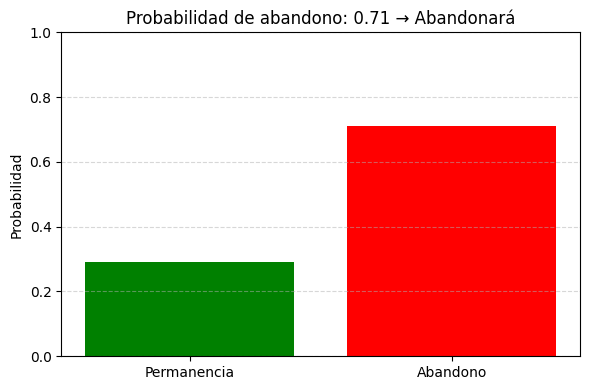

In [44]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))
# plt.bar(["Permanencia", "Abandono"], [1 - probabilidad, probabilidad], color=["green", "red"])
# plt.title(f"Probabilidad de abandono: {probabilidad:.2f} → {estado}")
# plt.ylabel("Probabilidad")
# plt.ylim(0, 1)
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(["Permanencia", "Abandono"], [1 - probabilidad, probabilidad], color=["green", "red"])
plt.title(f"Probabilidad de abandono: {probabilidad:.2f} → {estado}")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# ✅ Guardar el gráfico en la raíz del entorno como archivo PNG
plt.tight_layout()
plt.savefig("grafico_probabilidad_abandono.png")  # Este archivo aparecerá en la raíz de tu cuaderno

plt.show()

#### **4.- Función para predecir abandono en un cliente nuevo**


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def predecir_cliente(valores_dict, rf_model, scaler, columnas_modelo, umbral=0.5, graficar=True):
    """
    Realiza una predicción de abandono para un cliente nuevo.

    Parámetros:
    - valores_dict: diccionario con valores del cliente (solo los que se quieren modificar)
    - rf_model: modelo RandomForest entrenado
    - scaler: objeto StandardScaler entrenado
    - columnas_modelo: lista de columnas esperadas por el modelo
    - umbral: probabilidad mínima para considerar abandono (default=0.5)
    - graficar: si True, muestra gráfico de probabilidad

    Retorna:
    - dict con estado ('Abandonará' o 'Permanecerá') y probabilidad
    """
    # Crear cliente base con ceros
    cliente = pd.DataFrame(np.zeros((1, len(columnas_modelo))), columns=columnas_modelo)

    # Asignar valores proporcionados
    for k, v in valores_dict.items():
        if k in cliente.columns:
            cliente.loc[0, k] = v
        else:
            print(f"⚠️ Advertencia: columna '{k}' no reconocida por el modelo y será ignorada.")

    # Escalar
    cliente_scaled = scaler.transform(cliente)

    # Predicción
    prob = rf_model.predict_proba(cliente_scaled)[0][1]
    estado = "Abandonará" if prob > umbral else "Permanecerá"

    # Gráfico
    if graficar:
        plt.figure(figsize=(6, 4))
        plt.bar(["Permanencia", "Abandono"], [1 - prob, prob], color=["green", "red"])
        plt.title(f"Probabilidad de abandono: {prob:.2f} → {estado}")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.show()

    return {"estado": estado, "probabilidad": round(prob, 2)}

#### **5.- Ejemplo de uso**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


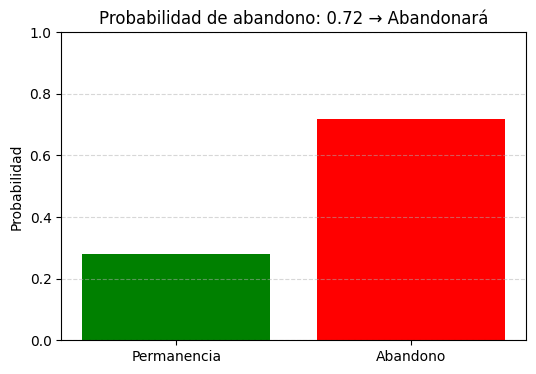

📌 Resultado: El cliente Abandonará (probabilidad: 0.72)


In [39]:
valores_cliente = {
    'customer.tenure': 5,
    'Facturacion_Mensual': 89.5,
    'account.Charges.Total': 2560,
    'Cuentas_Diarias': 3,
    'customer.gender_Male': 1,
    'internet.InternetService_Fibra Óptica': 1,
    'internet.TechSupport_Yes': 0,
    'account.Contract_One year': 0,
    'account.Contract_Two year': 0,
    'account.PaperlessBilling_Yes': 1,
    'account.PaymentMethod_Electronic check': 1
}

resultado = predecir_cliente(valores_cliente, rf_model, scaler, scaler.feature_names_in_)
print(f"📌 Resultado: El cliente {resultado['estado']} (probabilidad: {resultado['probabilidad']})")